In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wcad_data=pd.read_csv('FAOSTAT_data.csv',on_bad_lines='skip')

In [3]:
wcad_data.shape

(23346, 15)

In [4]:
wcad_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,WCA Round,Census Year,Unit,Value,Flag,Flag Description,Note
0,WCAD,Structural data from agricultural censuses,4,Afghanistan,60850,Number,27002,Holdings,2000,2002/03,No,3044670.00,A,Official figure,The enumeration unit was the Livestock Household
1,WCAD,Structural data from agricultural censuses,8,Albania,60850,Number,27002,Holdings,1990,1995,No,444300.00,A,Official figure,"Farms controlling agricultural land, whether o..."
2,WCAD,Structural data from agricultural censuses,8,Albania,50260,Area,27002,Holdings,2000,1998,ha,1889498.00,A,Official figure,Techno-economic units involved in agricultural...
3,WCAD,Structural data from agricultural censuses,8,Albania,5017,Average area,27002,Holdings,2000,1998,ha,4.05,A,Official figure,Techno-economic units involved in agricultural...
4,WCAD,Structural data from agricultural censuses,8,Albania,60850,Number,27002,Holdings,2000,1998,No,466809.00,A,Official figure,Techno-economic units involved in agricultural...


In [5]:
wcad_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'WCA Round', 'Census Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [7]:
print("Items:", wcad_data['Item'].unique())

Items: ['Holdings' 'Holdings with land size 0-<1' 'Holdings with land size 1-<2'
 'Holdings with land size 2-<3' 'Holdings with land size 2-<5'
 'Holdings with land size 3-<4' 'Holdings with land size 4-<5'
 'Holdings with land size 5-<10' 'Holdings with land size 10-<20'
 'Holdings owned by the holder or in owner-like possession'
 'Holdings rented from others'
 'Holdings operated under other forms of tenure' 'Civil persons'
 'Juridical' 'Holdings operated by civil persons, male'
 'Holdings operated by civil persons, female'
 'Holdings operated by civil persons, total' 'Household members, total'
 'Household members, engaged in agriculture, male'
 'Household members, engaged in agriculture, female'
 'Household members, engaged in agriculture, total'
 'Hired permanent workers' 'Holdings without land'
 'Holdings with land size 20-<50' 'Holdings with land size 50-<100'
 'Holdings with land size 100-<200' 'Holdings with land size 200-<500'
 'Household members, male' 'Household members, fema

In [8]:
print("Elements:", wcad_data['Element'].unique())

Elements: ['Number' 'Area' 'Average area' 'Percentage of total area'
 'Percent of total number'
 'Average persons per holding (hired permanent workers)'
 'Percent of total persons (household members)'
 'Average number of parcels per holding'
 'Percent of total persons (holders)'
 'Average persons per holding (household members)']


In [9]:
print("Countries:", wcad_data['Area'].nunique())

Countries: 187


In [10]:
wcad_data['Census Year']=wcad_data['Census Year'].astype(str)

print("Years:", sorted(wcad_data['Census Year'].unique()))

Years: ['1927', '1929', '1929/30', '1930', '1931', '1932', '1933', '1948', '1949', '1949/50', '1950', '1950/51', '1951', '1952', '1952-1954', '1954', '1958/59', '1959', '1959/60', '1960', '1960/61', '1961', '1961/62', '1962', '1963', '1963/64', '1964', '1964/65', '1968', '1968/69', '1969', '1969-1972', '1969/70', '1970', '1970/71', '1971', '1971/72', '1972', '1972/73', '1973', '1973/74', '1974', '1974/75', '1975', '1976', '1976/77', '1977', '1978', '1978/79', '1979', '1980', '1980/81', '1981', '1982', '1982/83', '1983', '1984', '1984/85', '1985', '1985/86', '1986', '1987', '1988', '1989', '1989-1992', '1989/90', '1990', '1990/91', '1991', '1991/92', '1992', '1993', '1994', '1994/95', '1995', '1996', '1996/97', '1997', '1998', '1998/99', '1999', '1999/00', '2000', '2000/01', '2001', '2001/02', '2002', '2002/03', '2003', '2003/04', '2004', '2004-2008', '2004/05', '2005', '2006', '2006-2010', '2006/07', '2007', '2007/08', '2008', '2008/09', '2009', '2009/10', '2010', '2010/11', '2011', '2

In [11]:
wcad_data=wcad_data.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)','Element Code','Item Code','Flag', 'Flag Description', 'Note'])

In [12]:
wcad_data=wcad_data.rename(columns={
    'Area':'Country',
    'Element':'Metric',
    'Item':'Item',
    'Census Year':'Year',
    'Value':'Value',
    'Unit':'Unit'
})

In [13]:
wcad_data=wcad_data.dropna(subset=['Value'])

In [14]:
wcad_data.head()

,Country,Metric,Item,WCA Round,Year,Unit,Value
0,Afghanistan,Number,Holdings,2000,2002/03,No,3044670.00
1,Albania,Number,Holdings,1990,1995,No,444300.00
2,Albania,Area,Holdings,2000,1998,ha,1889498.00
3,Albania,Average area,Holdings,2000,1998,ha,4.05
4,Albania,Number,Holdings,2000,1998,No,466809.00


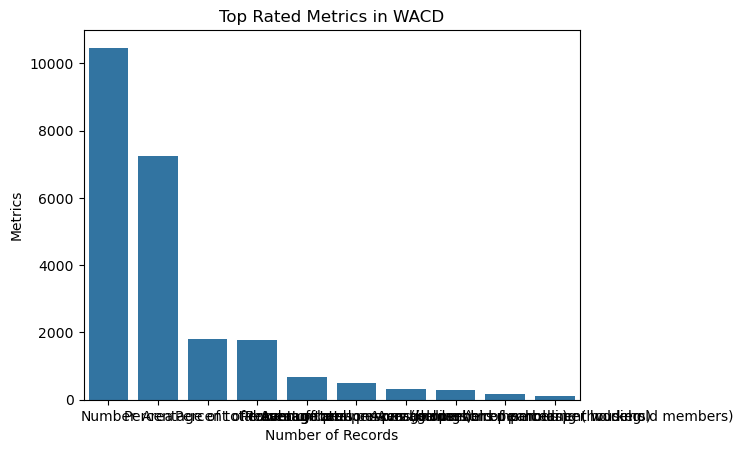

In [18]:
top_metrics=wcad_data['Metric'].value_counts().head(10)


sns.barplot(x=top_metrics.index,y=top_metrics.values)
plt.title("Top Rated Metrics in WACD")
plt.xlabel("Number of Records")
plt.ylabel("Metrics")
plt.show()

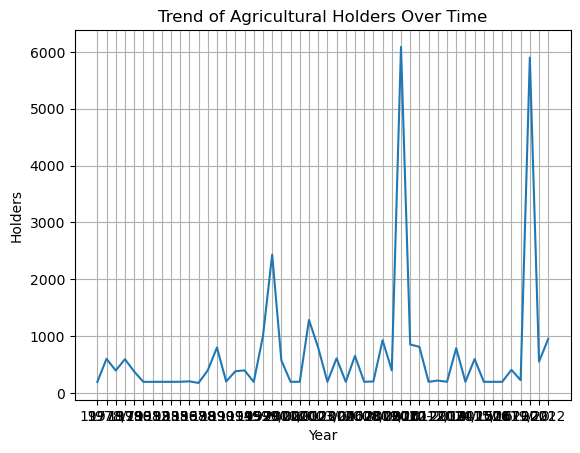

In [19]:
holders = wcad_data[wcad_data['Metric'].str.contains('holders',case=False)]
holders_sum=holders.groupby('Year')['Value'].sum().reset_index()

plt.plot(holders_sum['Year'],holders_sum['Value'])
plt.title("Trend of Agricultural Holders Over Time")
plt.xlabel("Year")
plt.ylabel("Holders")
plt.grid(True)
plt.show()

In [20]:
wcad_data['Feature'] = wcad_data['Metric'] + "_" + wcad_data['Item']

# Pivot to wide format

wcad_pivot = wcad_data.pivot_table(
    index=['Country', 'Year'],
    columns='Feature',
    values='Value'
).reset_index()

wcad_pivot.head()

Feature,Country,Year,Area_Civil persons,Area_Holdings,Area_Holdings operated under other forms of tenure,Area_Holdings owned by the holder or in owner-like possession,Area_Holdings rented from others,Area_Holdings under more than one form of tenure,Area_Holdings with land size 0-<1,Area_Holdings with land size 1-<2,...,"Percent of total persons (household members)_Household members, engaged in agriculture, female","Percent of total persons (household members)_Household members, engaged in agriculture, male","Percent of total persons (household members)_Household members, engaged in agriculture, total",Percentage of total area_Civil persons,Percentage of total area_Holdings operated under other forms of tenure,Percentage of total area_Holdings owned by the holder or in owner-like possession,Percentage of total area_Holdings rented from others,Percentage of total area_Holdings under more than one form of tenure,Percentage of total area_Juridical,Percentage of total area_Other legal status
0,Afghanistan,2002/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1998,451984.0,1889498.0,NaN,NaN,NaN,NaN,128508.0,198921.0,...,NaN,NaN,NaN,23.92,NaN,NaN,NaN,NaN,76.08,NaN
3,Albania,2012,NaN,371609.0,7432.0,304638.0,59539.0,NaN,99758.0,109987.0,...,NaN,NaN,NaN,NaN,2.0,81.98,16.02,NaN,NaN,NaN
4,Algeria,1930,NaN,210073055.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


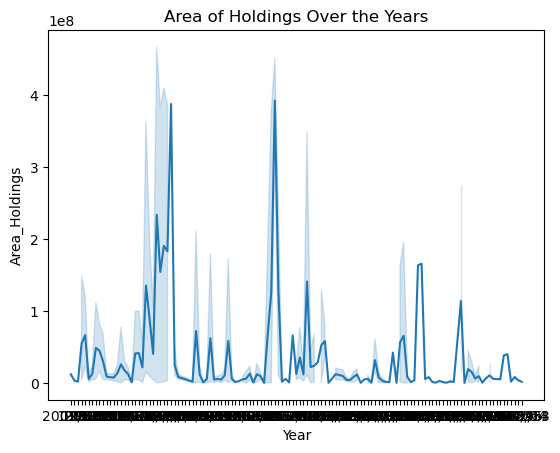

In [21]:
sns.lineplot(data=wcad_pivot, x='Year', y='Area_Holdings')
plt.title('Area of Holdings Over the Years')
plt.show()

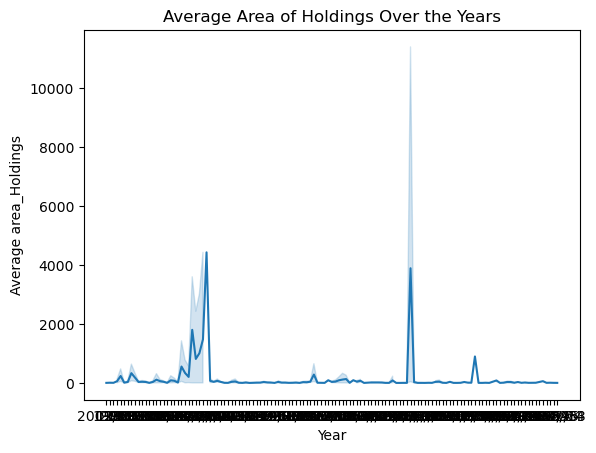

In [22]:
sns.lineplot(data=wcad_pivot, x='Year', y='Average area_Holdings')
plt.title('Average Area of Holdings Over the Years')
plt.show()